In [93]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [94]:
pgf = pd.read_csv("Bancarrota.finalll.csv")
data= pgf.dropna()
print(data)
print(list(data.columns))

     Data Year - Fiscal  Tobin's Q     EPS  Liquidity  Profitability  \
0                  2007      6.650  -0.360     -1.350        -20.950   
1                  2009      0.825  -4.834      0.245         -1.853   
2                  2008      5.020  -0.056      0.041        -14.427   
3                  2008      0.823  -0.375      0.073         -1.658   
4                  2008      2.664 -10.544     -0.416         -1.776   
..                  ...        ...     ...        ...            ...   
190                2012      1.676  -5.622     -1.315         -1.358   
191                2007      1.460   0.010     -0.400        -21.900   
192                2007      1.114  -0.337     -0.143         -0.353   
193                2007      0.930  -8.530      0.000         -0.070   
194                2008      1.510  -0.043      0.252         -8.346   

     Productivity  Leverage Ratio  Asset Turnover  Operational Margin  \
0          -0.160          -1.160           0.630             

In [95]:
data['BK'].value_counts()

0    120
1     71
Name: BK, dtype: int64

In [96]:
import random       

In [97]:
data.groupby(['BK']).indices

{0: array([  0,   8,  18,  20,  22,  24,  27,  33,  41,  43,  49,  51,  52,
         53,  54,  55,  56,  58,  59,  60,  62,  63,  65,  66,  67,  68,
         69,  70,  71,  73,  74,  76,  77,  78,  79,  81,  82,  83,  84,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117,
        119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        134, 135, 136, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 154, 155, 156, 158, 159, 160, 161, 162, 163,
        164, 165, 166, 167, 169, 170, 171, 174, 175, 176, 177, 178, 181,
        182, 187, 189], dtype=int64),
 1: array([  1,   2,   3,   4,   5,   6,   7,   9,  10,  11,  12,  13,  14,
         15,  16,  17,  19,  21,  23,  25,  26,  28,  29,  30,  31,  32,
         34,  35,  36,  37,  38,  39,  40,  42,  44,  45,  46,  47,  48,
         50,  57,  61,  64,  72,  75,  80,  85,  86,  87,  88,  89, 105,
       

In [98]:
ceros=[  0,   8,  18,  20,  22,  24,  27,  33,  41,  43,  49,  51,  52,
         53,  54,  55,  56,  58,  59,  60,  62,  63,  65,  66,  67,  68,
         69,  70,  71,  73,  74,  76,  77,  78,  79,  81,  82,  83,  84,
         90,  91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102,
        103, 104, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 117,
        119, 120, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132,
        134, 135, 136, 137, 138, 139, 142, 143, 144, 145, 146, 147, 148,
        149, 150, 151, 152, 154, 155, 156, 158, 159, 160, 161, 162, 163,
        164, 165, 166, 167, 169, 170, 171, 174, 175, 176, 177, 178, 181,
        182, 187, 189]
len(ceros)

120

In [99]:
aux=random.sample(range(0,120),50)
aux1=[ ]
for i in range(0,50):
    aux1.append(ceros[aux[i]])

aux1

[132,
 90,
 134,
 95,
 103,
 165,
 98,
 73,
 18,
 154,
 117,
 58,
 170,
 0,
 112,
 54,
 51,
 124,
 67,
 114,
 149,
 169,
 106,
 71,
 76,
 143,
 161,
 56,
 79,
 91,
 171,
 128,
 160,
 137,
 65,
 164,
 66,
 123,
 99,
 174,
 62,
 108,
 131,
 176,
 163,
 150,
 138,
 69,
 122,
 111]

In [100]:
data.drop(aux1,inplace=True)
data

C:\Users\mvele\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
1,2009,0.825,-4.834,0.245,-1.853,-0.089,1.644,0.510,-0.174,-74.363,3.072,-0.542,-0.827,-0.681,1
2,2008,5.020,-0.056,0.041,-14.427,-2.367,0.190,0.506,-4.676,-0.626,2801.400,-0.141,-0.456,-0.600,1
3,2008,0.823,-0.375,0.073,-1.658,-0.209,1.869,0.231,-0.902,-5.777,30.435,-0.174,-0.615,-0.585,1
4,2008,2.664,-10.544,-0.416,-1.776,0.178,-1.585,1.133,0.157,-22.433,-0.215,-0.767,-0.647,-0.471,1
5,2008,1.974,-2.074,-1.117,-3.711,-0.552,-1.415,1.212,-0.455,-10.914,-10.136,-0.151,0.397,-0.400,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2012,1.676,-5.622,-1.315,-1.358,0.027,-2.091,0.605,0.044,-62.467,-0.025,-0.288,4.599,0.996,1
191,2007,1.460,0.010,-0.400,-21.900,0.050,4.640,0.080,0.630,0.690,275.120,-0.075,1.483,1.000,0
192,2007,1.114,-0.337,-0.143,-0.353,-0.054,10.174,1.371,-0.039,-0.536,114.985,1.175,0.281,1.109,1
193,2007,0.930,-8.530,0.000,-0.070,-0.040,2.970,0.380,-0.100,-0.410,35.850,1.221,0.098,1.432,0


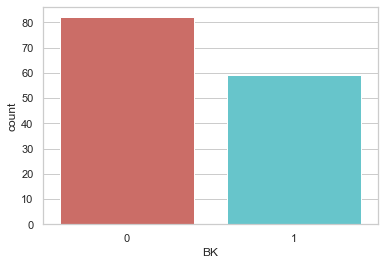

<Figure size 432x288 with 0 Axes>

In [101]:
sns.countplot(x='BK',data=data, palette = 'hls')
plt.show()
plt.savefig('count_plot')

In [102]:
count_no_sub = len(data[data['BK']==0])
count_sub = len(data[data['BK']==1])
pct_of_no_sub = count_no_sub/(count_no_sub+count_sub)
print("percentage of healthy bank", pct_of_no_sub*100)
pct_of_sub = count_sub/(count_no_sub+count_sub)
print("percentage of bankruptcy", pct_of_sub*100)

percentage of healthy bank 58.156028368794324
percentage of bankruptcy 41.843971631205676


In [103]:
data.groupby('BK').mean()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth
BK,,,,,,,,,,,,,,
0,2007.000000,2.838171,1.695976,0.145122,-0.941098,0.056951,0.653902,1.116098,-1.320366,0.006341,1199.629756,2.257732,0.141671,0.075451
1,2009.559322,1.763559,-2.596814,-0.220153,-2.650017,-0.250136,-3.941000,1.245763,-3.116068,-52.151831,65.137373,-0.142000,0.471373,0.000305


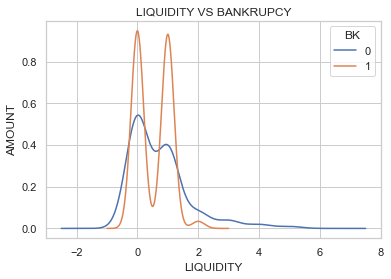

In [104]:
%matplotlib inline
pd.crosstab(data.Liquidity,data.BK).plot(kind='kde')
plt.title('LIQUIDITY VS BANKRUPCY')
plt.xlabel('LIQUIDITY')
plt.ylabel('AMOUNT')
plt.savefig('Liquidity')

In [105]:
train = data.copy()
train.head()

,Data Year - Fiscal,Tobin's Q,EPS,Liquidity,Profitability,Productivity,Leverage Ratio,Asset Turnover,Operational Margin,Return on Equity,Market Book Ratio,Assets Growth,Sales Growth,Employee Growth,BK
1,2009,0.825,-4.834,0.245,-1.853,-0.089,1.644,0.510,-0.174,-74.363,3.072,-0.542,-0.827,-0.681,1
2,2008,5.020,-0.056,0.041,-14.427,-2.367,0.190,0.506,-4.676,-0.626,2801.400,-0.141,-0.456,-0.600,1
3,2008,0.823,-0.375,0.073,-1.658,-0.209,1.869,0.231,-0.902,-5.777,30.435,-0.174,-0.615,-0.585,1
4,2008,2.664,-10.544,-0.416,-1.776,0.178,-1.585,1.133,0.157,-22.433,-0.215,-0.767,-0.647,-0.471,1
5,2008,1.974,-2.074,-1.117,-3.711,-0.552,-1.415,1.212,-0.455,-10.914,-10.136,-0.151,0.397,-0.400,1


In [106]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 141 entries, 1 to 194
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Data Year - Fiscal  141 non-null    int64  
 1   Tobin's Q           141 non-null    float64
 2   EPS                 141 non-null    float64
 3   Liquidity           141 non-null    float64
 4   Profitability       141 non-null    float64
 5   Productivity        141 non-null    float64
 6   Leverage Ratio      141 non-null    float64
 7   Asset Turnover      141 non-null    float64
 8   Operational Margin  141 non-null    float64
 9   Return on Equity    141 non-null    float64
 10  Market Book Ratio   141 non-null    float64
 11  Assets Growth       141 non-null    float64
 12  Sales Growth        141 non-null    float64
 13  Employee Growth     141 non-null    float64
 14  BK                  141 non-null    int64  
dtypes: float64(13), int64(2)
memory usage: 21.7 KB


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.iloc[:,:14], 
                                                    train.iloc[:,14] ,test_size=0.20, 
                                                    shuffle=True)

In [108]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression(solver='lbfgs', max_iter=700)
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

C:\Users\mvele\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [109]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        16
           1       0.92      0.92      0.92        13

    accuracy                           0.93        29
   macro avg       0.93      0.93      0.93        29
weighted avg       0.93      0.93      0.93        29



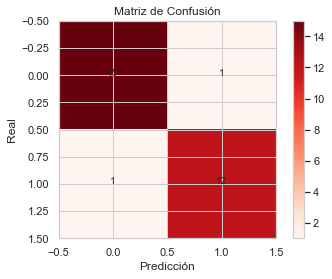

In [110]:
import itertools
cm = confusion_matrix(y_test, predictions)
plt.imshow(cm, cmap=plt.cm.Reds, interpolation='nearest')
plt.colorbar()
plt.title('Matriz de Confusión')
plt.xlabel('Predicción')
plt.ylabel('Real')
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], 'd'),
             horizontalalignment='center')
plt.show()